Source: https://gist.github.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/cec0340503d82d270821e03254993b6dede60afb/healthcare-dataset-stroke-data.csv')

In [3]:
df.head().append(df.tail())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [74]:
# Select only columns with categorical data types
cat_cols = [col for col in df.columns if df[col].dtype in ['object']]

# Loop through every categorical column and get value counts
for column in cat_cols:
    value_counts = df[column].value_counts()
    print(value_counts)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


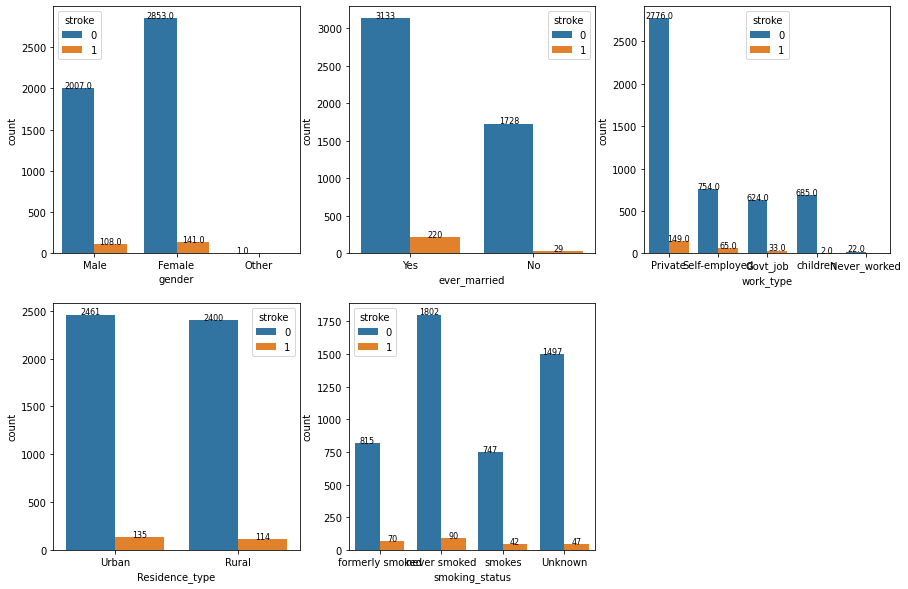

In [102]:
import warnings
warnings.filterwarnings('ignore')

# Set up the figure with 3 columns and 2 rows
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Flatten the axes into a 1D array for easier iteration
axes = axes.flatten()

# Loop through each categorical column and create a countplot with value counts displayed on top
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='stroke', data=df, ax=axes[i])
    
    # Add the value counts on top of each bar
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 0.3, height, ha="center", fontsize=8)

# Remove any unused axes
for j in range(i+1, len(axes)):
    axes[j].remove()

plt.show()

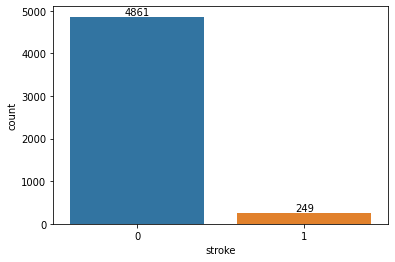

In [59]:
ax = sns.countplot(x='stroke', data=df)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

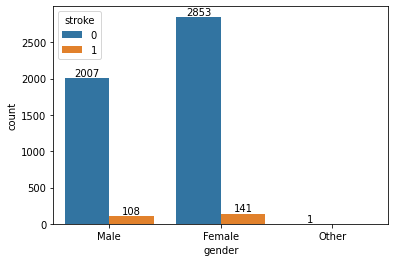

In [57]:
ax = sns.countplot(x='gender', hue='stroke', data=df)
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

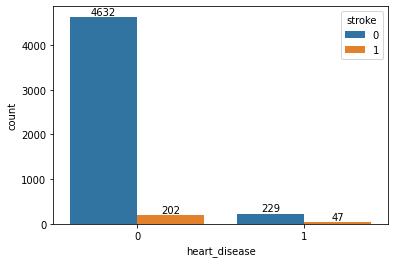

In [61]:
ax = sns.countplot(x='heart_disease', hue='stroke', data=df)
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()